In [985]:
import sys
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

warnings.filterwarnings("ignore")

sns.set(style='ticks', font_scale=1.25)

In [986]:
workdir = '../examples/test_daily/outputs'

Depth = [0.01, 0.05, 0.15, 0.30,0.50,0.80,1.10,1.60,2.40, 3.20, 4.00, 5.00,7.00,9.00, 12.00, 15.00, 20.00, 25.00, 30.00, 40.00]

# year_list = np.arange(1981, 1986)
# year_list = np.arange(1991, 1996)
# year_list = np.arange(2001, 2006)
# year_list = np.arange(2011, 2015)

n_shows = 40

year_dump = 1901
year_list = np.arange(year_dump, year_dump + n_shows)
# year_list = np.arange(1806, 1811)

0 1901
1 1902
2 1903
3 1904
4 1905
5 1906
6 1907
7 1908
8 1909
9 1910
10 1911
11 1912
12 1913
13 1914
14 1915
15 1916
16 1917
17 1918
18 1919
19 1920
20 1921
21 1922
22 1923
23 1924
24 1925
25 1926
26 1927
27 1928
28 1929
29 1930


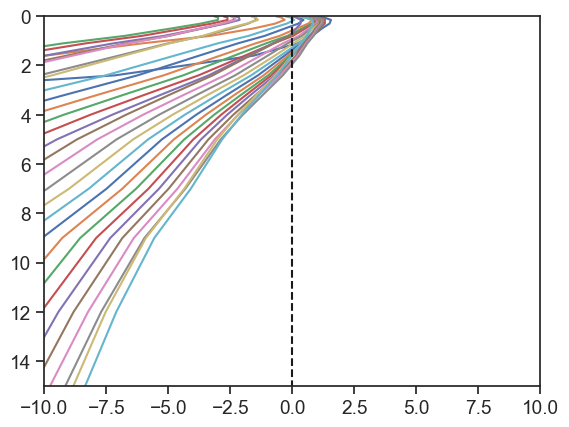

In [987]:
for i, yr in enumerate(year_list):

    dump0 = pd.read_csv(os.path.join(workdir, '01010'+str(yr)+'da'), delim_whitespace=True, index_col = 1, date_format = "%d%m%Y")
    dump1 = pd.read_csv(os.path.join(workdir, '01010'+str(yr)+'ds'), delim_whitespace=True, index_col = 1, date_format = "%d%m%Y")

    if i ==0 :

        out_da = dump0.copy()
        out_ds = dump1.copy()
    
    else:

        out_da = pd.concat([out_da, dump0])
        out_ds = pd.concat([out_ds, dump1])

    print(i, yr)

    TSOIL0 = dump1[['TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'TEMP_5', 'TEMP_6', 'TEMP_7',
       'TEMP_8', 'TEMP_9', 'TEMP_10', 'TEMP_11', 'TEMP_12', 'TEMP_13',
       'TEMP_14', 'TEMP_15', 'TEMP_16', 'TEMP_17', 'TEMP_18', 'TEMP_19',
       'TEMP_20']].values
    
    plt.plot(TSOIL0[0:, ].mean(axis=0), Depth, label = str(yr))
    
plt.vlines(0, ymin = 0, ymax = 40, linestyles='dashed', colors= 'k')
plt.ylim([15, 0])
plt.xlim([-10,10])

if len(year_list)<=5: plt.legend()


-3.157414

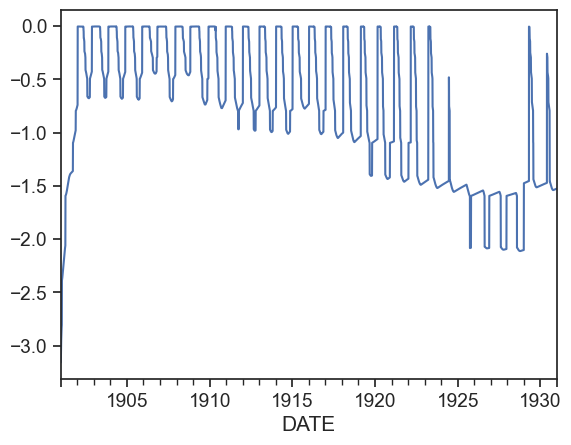

In [988]:
out_da['ACTV_LYR'][out_da['ACTV_LYR']<-8888] = np.nan
out_da['ACTV_LYR'].plot()
out_da['ACTV_LYR'].min()

<Axes: xlabel='DATE'>

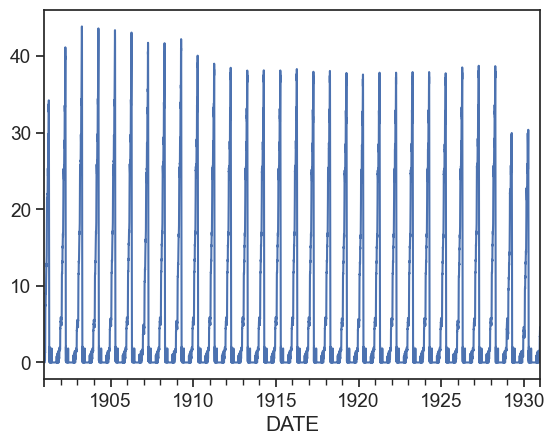

In [989]:
out_da['SNOWPACK'].plot()

In [990]:
out_ds.columns

Index(['DOY', 'HOUR', 'SOL_RADN', 'AIR_TEMP', 'HUM', 'WIND', 'PREC', 'SOIL_RN',
       'SOIL_LE', 'SOIL_H', 'SOIL_G', 'ECO_RN', 'ECO_LE', 'ECO_H', 'ECO_G',
       'TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'TEMP_5', 'TEMP_6', 'TEMP_7',
       'TEMP_8', 'TEMP_9', 'TEMP_10', 'TEMP_11', 'TEMP_12', 'TEMP_13',
       'TEMP_14', 'TEMP_15', 'TEMP_16', 'TEMP_17', 'TEMP_18', 'TEMP_19',
       'TEMP_20', 'TEMP_LITTER', 'TEMP_SNOW'],
      dtype='object')

In [991]:

TSOIL = out_ds[['TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'TEMP_5', 'TEMP_6', 'TEMP_7',
       'TEMP_8', 'TEMP_9', 'TEMP_10', 'TEMP_11', 'TEMP_12', 'TEMP_13',
       'TEMP_14', 'TEMP_15', 'TEMP_16', 'TEMP_17', 'TEMP_18', 'TEMP_19',
       'TEMP_20']].values

print(TSOIL.shape)

(10957, 20)


Text(0, 0.5, 'Depth (m)')

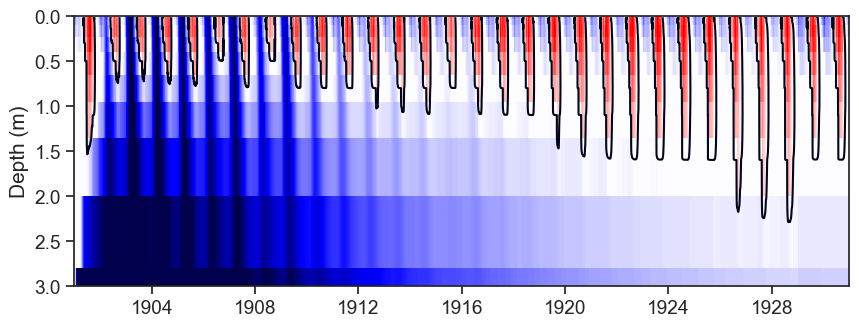

In [992]:
plt.figure(figsize=[10,3.5])
plt.pcolormesh(out_ds.index, Depth, TSOIL.T, cmap = 'seismic', vmax=15, vmin=-15)
plt.contour(out_ds.index, Depth, TSOIL.T, [0])
plt.ylim([3, 0])
plt.ylabel('Depth (m)')